In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from collections import Counter
from itertools import combinations

In [2]:
data = pd.read_csv('data.csv')
data.head(3)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015
1,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,7.1,2015
2,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,6.3,2015


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


# Предобработка датасета

In [4]:
answer_ls = [] # создадим список с ответами. сюда будем добавлять ответы по мере прохождения теста
# сюда можем вписать создание новых колонок в датасете

# 1. У какого фильма из списка самый большой бюджет?
Варианты ответов:
1. The Dark Knight Rises (tt1345836)
2. Spider-Man 3 (tt0413300)
3. Avengers: Age of Ultron (tt2395427)
4. The Warrior's Way	(tt1032751)
5. Pirates of the Caribbean: On Stranger Tides (tt1298650)

In [5]:
data[data['budget'] >= data['budget'].max()]['original_title'].values[0]

'Pirates of the Caribbean: On Stranger Tides'

In [6]:
# Вариант 2
data.sort_values(['budget'], ascending=False).head(1)['original_title'].values[0]

'Pirates of the Caribbean: On Stranger Tides'

In [7]:
# Вариант 3
# idxmax() возвращает индекс максимального элемента по запрошенной оси
data.iloc[data['budget'].idxmax()]['original_title']

'Pirates of the Caribbean: On Stranger Tides'

In [8]:
# тут вводим ваш ответ и добавлем в его список ответов (сейчас для примера стоит "1")
answer_ls.append(5)

# 2. Какой из фильмов самый длительный (в минутах)
1. The Lord of the Rings: The Return of the King	(tt0167260)
2. Gods and Generals	(tt0279111)
3. King Kong	(tt0360717)
4. Pearl Harbor	(tt0213149)
5. Alexander	(tt0346491)

In [9]:
data.loc[data.runtime == data.runtime.max(), 'original_title'].values[0]

'Gods and Generals'

In [10]:
# Вариант 2
data.original_title[data.runtime.idxmax()]

'Gods and Generals'

In [11]:
# Вариант 3
data[['runtime', 'original_title', 'imdb_id']].sort_values(
    'runtime', ascending=False).iloc[0]

runtime                         214
original_title    Gods and Generals
imdb_id                   tt0279111
Name: 1157, dtype: object

In [12]:
answer_ls.append(2)

# 3. Какой из фильмов самый короткий (в минутах)
Варианты ответов:

1. Home on the Range	tt0299172
2. The Jungle Book 2	tt0283426
3. Winnie the Pooh	tt1449283
4. Corpse Bride	tt0121164
5. Hoodwinked!	tt0443536

In [13]:
data.loc[data.runtime==data.runtime.min(),'original_title'].values[0]
# или
# data.original_title[data.runtime.idxmin()]

'Winnie the Pooh'

In [14]:
# Вариант 2
data[['runtime', 'original_title', 'imdb_id']].sort_values('runtime', ascending = True).iloc[0]

runtime                        63
original_title    Winnie the Pooh
imdb_id                 tt1449283
Name: 768, dtype: object

In [15]:
answer_ls.append(3)

# 4. Какова средняя длительность фильмов?

Варианты ответов:
1. 115
2. 110
3. 105
4. 120
5. 100


In [16]:
round(data.runtime.mean())

110

In [17]:
answer_ls.append(2)

# 5. Средняя длительность фильма по медиане?
Варианты ответов:
1. 107
2. 112
3. 101
4. 120
5. 115




In [18]:
data.runtime.median()

107.0

In [19]:
# Вариант 2
data.describe().runtime['50%']

107.0

In [20]:
answer_ls.append(1)

# 6. Какой самый прибыльный фильм?
Варианты ответов:
1. The Avengers	tt0848228
2. Minions	tt2293640
3. Star Wars: The Force Awakens	tt2488496
4. Furious 7	tt2820852
5. Avatar	tt0499549

#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [21]:
data['profit'] = data.revenue - data.budget
data.loc[data.profit==data.profit.max(),'original_title'].values[0]

'Avatar'

In [22]:
# Вариант 2
data.original_title[data.profit.idxmax()]

'Avatar'

In [23]:
# Вариант 3
data[['profit', 'original_title', 'imdb_id']].sort_values(
    'profit', ascending=False).iloc[0]['original_title']

'Avatar'

In [24]:
answer_ls.append(5)

# 7. Какой фильм самый убыточный?
Варианты ответов:
1. Supernova tt0134983
2. Frozen (tt2294629)
3. Flushed Away	tt0424095
4. The Adventures of Pluto Nash	tt0180052
5. The Lone Ranger	tt1210819

In [25]:
data[data.profit == data.profit.min()].original_title.values[0]

'The Lone Ranger'

In [26]:
# Вариант 2
data.original_title[data.profit.idxmin()]

'The Lone Ranger'

In [27]:
# Вариант 3
data.sort_values(by='profit').head(1)['original_title'].values[0]

'The Lone Ranger'

In [28]:
# Вариант 4
data[['profit', 'original_title', 'imdb_id']].sort_values(
    'profit', ascending=False).iloc[-1]['original_title']

'The Lone Ranger'

In [29]:
answer_ls.append(5)

# 8. Сколько всего фильмов в прибыли?
Варианты ответов:
1. 1478
2. 1520
3. 1241
4. 1135
5. 1398


In [30]:
len(data[data.profit > 0])

1478

In [31]:
# Вариант 2
len(data[data.revenue > data.budget])

1478

In [32]:
# Вариант 3
data.loc[(data.profit)>0].shape[0]

1478

In [33]:
# Вариант 4
data.original_title[data['profit']>0].count()

1478

In [34]:
# Вариант 5
data[data['profit']>0].describe().loc['count']

budget          1478.0
revenue         1478.0
runtime         1478.0
vote_average    1478.0
release_year    1478.0
profit          1478.0
Name: count, dtype: float64

In [35]:
answer_ls.append(1)

# 9. Самый прибыльный фильм в 2008 году?
Варианты ответов:
1. Madagascar: Escape 2 Africa	tt0479952
2. Iron Man	tt0371746
3. Kung Fu Panda	tt0441773
4. The Dark Knight	tt0468569
5. Mamma Mia!	tt0795421

In [36]:
data.loc[data.release_year == 2008].sort_values(
    by='profit', ascending=False).head(1)['original_title'].values[0]

'The Dark Knight'

In [37]:
# Вариант 2
data[['profit', 'original_title', 'imdb_id']][data['release_year']
                                              == 2008].sort_values('profit', ascending=False)[:3]

,profit,original_title,imdb_id
599,816921825,The Dark Knight,tt0468569
603,601636033,Indiana Jones and the Kingdom of the Crystal S...,tt0367882
607,557841637,Mamma Mia!,tt0795421


In [38]:
# Вариант 3
d = data.loc[data.release_year == 2008]
d.set_index('original_title')['profit'].idxmax()

'The Dark Knight'

In [39]:
answer_ls.append(4)

# 10. Самый убыточный фильм за период с 2012 по 2014 (включительно)?
Варианты ответов:
1. Winter's Tale	tt1837709
2. Stolen	tt1656186
3. Broken City	tt1235522
4. Upside Down	tt1374992
5. The Lone Ranger	tt1210819


In [40]:
data.loc[(data.release_year>=2012)&(data.release_year<=2014)].sort_values(by='profit').head(1)['original_title'].values[0]

'The Lone Ranger'

In [41]:
# Вариант 2
data[data.profit == data.query('2012 <= release_year <= 2014').profit.min()].original_title

1245    The Lone Ranger
Name: original_title, dtype: object

In [42]:
answer_ls.append(5)

# 11. Какого жанра фильмов больше всего?
Варианты ответов:
1. Action
2. Adventure
3. Drama
4. Comedy
5. Thriller

In [43]:
pd.Series(data['genres'].str.cat(sep='|').split('|')).value_counts().index[0]

'Drama'

In [44]:
# Вариант 2 через Counter
Counter(data['genres'].str.cat(sep='|').split('|')).most_common(1)
# # или
# Counter(data.genres.str.split('|').sum()).most_common(1)

[('Drama', 782)]

In [45]:
# Вариант 3 через explode и groupby
data_copy = data.copy()
data_copy['genres_list'] = data_copy.genres.str.split('|')
data_copy.explode('genres_list').groupby(
    by='genres_list').agg({'imdb_id': 'count'}).idxmax()[0]

# explode - дублирует строки, растягивая на количество значений в них и 
# помещая каждое значение в отдельную строку
# с большими данными explode усложняет работу

'Drama'

In [46]:
answer_ls.append(3)

# 12. Какого жанра среди прибыльных фильмов больше всего?
Варианты ответов:
1. Drama
2. Comedy
3. Action
4. Thriller
5. Adventure

In [47]:
data_profit = data[data.profit > 0].copy()
genres = set(data.genres.str.split('|').sum())
pd.Series({x:data_profit[data_profit.genres.str.contains(x)].profit.count() for x in genres}).sort_values(ascending = False).index[0]

'Drama'

In [48]:
# Вариант 2
pd.Series((data_profit.genres.str.split('|').sum())).value_counts().index[0]

'Drama'

In [49]:
answer_ls.append(1)

# 13. У какого режиссера самые большие суммарные кассовые сборы?
Варианты ответов:
1. Steven Spielberg
2. Christopher Nolan 
3. David Yates
4. James Cameron
5. Peter Jackson

In [50]:
data_copy = data.copy()
data_copy['director_list'] = data_copy.director.str.split('|')
data_copy.explode('director_list').groupby(by='director_list').agg({'profit' : 'sum'}).sort_values('profit', ascending=False).index[0]

'Peter Jackson'

In [51]:
# Вариант 2
directors = set(data.director.str.split('|').sum())
pd.Series({x: data[data.director.str.contains(x)].profit.sum() for x in directors}).\
                    sort_values(ascending = False).head(1)

Peter Jackson    5202593685
dtype: int64

In [52]:
answer_ls.append(5)

# 14. Какой режиссер снял больше всего фильмов в стиле Action?
Варианты ответов:
1. Ridley Scott
2. Guy Ritchie
3. Robert Rodriguez
4. Quentin Tarantino
5. Tony Scott

In [53]:
def counter(movie_bd, x):
    data_plot=movie_bd[x].str.cat(sep='|')
    dat=pd.Series(data_plot.split('|'))
    info=dat.value_counts(ascending=False)
    return info

action_df = data[data.genres.str.contains('Action')].copy()
sum_gen=counter(action_df,'director')

for gen in sum_gen.index:
    sum_gen[gen] = action_df['imdb_id'][action_df['director'].map\
                                       (lambda x: True if gen in x else False)].count()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen

,0
Robert Rodriguez,9
Paul W.S. Anderson,7
Michael Bay,7
Ridley Scott,6
Antoine Fuqua,6
...,...
Mikael HÃ¥fstrÃ¶m,1
Adam Shankman,1
Kevin Smith,1
Paul Abascal,1


In [54]:
# Вариант 2
action_df['director_list'] = action_df.director.str.split('|')
action_df.explode('director_list').groupby(by='director_list').agg({'imdb_id' : 'count'}).sort_values('imdb_id', ascending=False).index[0]

'Robert Rodriguez'

In [55]:
# Вариант 3
pd.Series(data[data.genres.str.contains('Action')].director.str.split('|').sum()).value_counts().index[0]

'Robert Rodriguez'

In [56]:
answer_ls.append(3)

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году?
Варианты ответов:
1. Nicolas Cage
2. Tom Hardy
3. Chris Hemsworth
4. Jim Sturgess
5. Emma Stone


In [57]:
data_copy = data[data.release_year == 2012].copy()
data_copy['cast_list'] = data_copy.cast.str.split('|')
data_copy.explode('cast_list').groupby(by='cast_list').agg({'profit' : 'sum'})\
            .sort_values('profit', ascending=False).iloc[0]

profit    1542450773
Name: Chris Hemsworth, dtype: int64

In [58]:
answer_ls.append(3)

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов? (в фильмах где бюджет выше среднего по данной выборке)
Варианты ответов:
1. Tom Cruise
2. Mark Wahlberg 
3. Matt Damon
4. Angelina Jolie
5. Adam Sandler

In [59]:
pd.Series(data[data.budget > data.budget.mean()].cast.str.split('|').sum()).value_counts().index[0]

'Matt Damon'

In [60]:
answer_ls.append(3)

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage?  
Варианты ответа:
1. Drama
2. Action
3. Thriller
4. Adventure
5. Crime

In [61]:
Counter(data[data.cast.str.contains('Nicolas Cage')].genres.str.split('|').sum()).most_common(1)

[('Action', 17)]

In [62]:
# Вариант 2
NC_data = data[data.cast.str.contains('Nicolas Cage')].copy()
pd.Series({x: NC_data[NC_data.genres.str.contains(x)].original_title.count()
           for x in genres}).sort_values(ascending=False).head(5)

Action      17
Thriller    15
Drama       12
Crime       10
Fantasy      8
dtype: int64

In [63]:
# Вариант 3
pd.DataFrame(NC_data.genres.str.split('|').tolist()).stack().value_counts().head(5)

Action      17
Thriller    15
Drama       12
Crime       10
Fantasy      8
dtype: int64

In [64]:
answer_ls.append(2)

# 18. Самый убыточный фильм от Paramount Pictures
Варианты ответа:

1. K-19: The Widowmaker tt0267626
2. Next tt0435705
3. Twisted tt0315297
4. The Love Guru tt0811138
5. The Fighter tt0964517

In [65]:
data[data['production_companies'].str.contains('Paramount Pictures')].sort_values(
    'profit', ascending=True)[:1].original_title

925    K-19: The Widowmaker
Name: original_title, dtype: object

In [66]:
# Вариант 2
par_pic = data[data['production_companies'].str.contains(
    'Paramount Pictures')].copy()
par_pic.original_title[par_pic.profit.idxmin()]
par_pic[par_pic['profit'] == par_pic['profit'].min()]['original_title']

925    K-19: The Widowmaker
Name: original_title, dtype: object

In [67]:
# Вариант 3
print_columns = ['profit', 'original_title', 'imdb_id', 'production_companies']
data[print_columns][data['production_companies'].map(
    lambda x: True if 'Paramount Pictures' in x else False)].sort_values('profit', ascending=True)[:3]

,profit,original_title,imdb_id,production_companies
925,-64831034,K-19: The Widowmaker,tt0267626,Paramount Pictures|Intermedia Films|National G...
1123,-60519261,Timeline,tt0300556,Paramount Pictures|Donners' Company|Mutual Fil...
1722,-51788987,Next,tt0435705,Paramount Pictures|Virtual Studios|Revolution ...


In [68]:
answer_ls.append(1)

# 19. Какой год стал самым успешным по суммарным кассовым сборам?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2002
5. 2015

In [69]:
data.groupby('release_year')['profit'].sum().sort_values(0, ascending=False)[:5]

release_year
2015    18668572378
2014    16397812953
2012    16077001687
2013    15243179791
2011    14730241341
Name: profit, dtype: int64

In [70]:
# Вариант 2
data.groupby(['release_year'])['profit'].sum().idxmax()

2015

In [71]:
# Вариант 3 c pivot_table
data.pivot_table(values=['profit'], index=['release_year'],
                 aggfunc='sum').sort_values('profit', ascending=False).head(3)

,profit
release_year,
2015,18668572378
2014,16397812953
2012,16077001687


In [72]:
answer_ls.append(5)

# 20. Какой Самый прибыльный год для студии Warner Bros?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2010
5. 2015

In [73]:
WarnerB = data[data.production_companies.str.contains('Warner Bros')].copy()
WarnerB.groupby('release_year')['profit'].sum().sort_values(0, ascending=False)[:5]

release_year
2014    2295464519
2007    2201675217
2008    2134595031
2010    1974712985
2011    1871393682
Name: profit, dtype: int64

In [74]:
answer_ls.append(1)

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [75]:
data['release_date'] = pd.to_datetime(data['release_date'])
data.release_date.dt.month.value_counts().index[0]

9

In [76]:
answer_ls.append(4)

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)
Варианты ответа:
1. 345
2. 450
3. 478
4. 523
5. 381

In [77]:
data[(data.release_date.dt.month >= 6) & (data.release_date.dt.month <= 8)].original_title.count()

450

In [78]:
len(data[data.release_date.dt.month.isin([6, 7, 8,])])

450

In [79]:
answer_ls.append(2)

# 23. Какой режисер выпускает (суммарно по годам) больше всего фильмов зимой?
Варианты ответов:
1. Steven Soderbergh
2. Christopher Nolan
3. Clint Eastwood
4. Ridley Scott
5. Peter Jackson

In [80]:
director = list(set(data.director.str.split('|').sum()))
winter_month = [1, 2, 12]
data_winter = data[data.release_date.dt.month.isin(winter_month)]
pd.Series({x:data_winter[data_winter['director'].str.contains(x)].original_title.count() for x in director}).sort_values(ascending = False)[:5]

Peter Jackson        7
Clint Eastwood       6
Steven Soderbergh    6
Shawn Levy           4
Nancy Meyers         4
dtype: int64

Peter Jackson        7
Clint Eastwood       6
Steven Soderbergh    6
Nancy Meyers         4
Shawn Levy           4
Martin Scorsese      4
Adam Shankman        4
Peter Farrelly       3
Donald Petrie        3
Edward Zwick         3
dtype: int64


Text(0, 0.5, 'Movies')

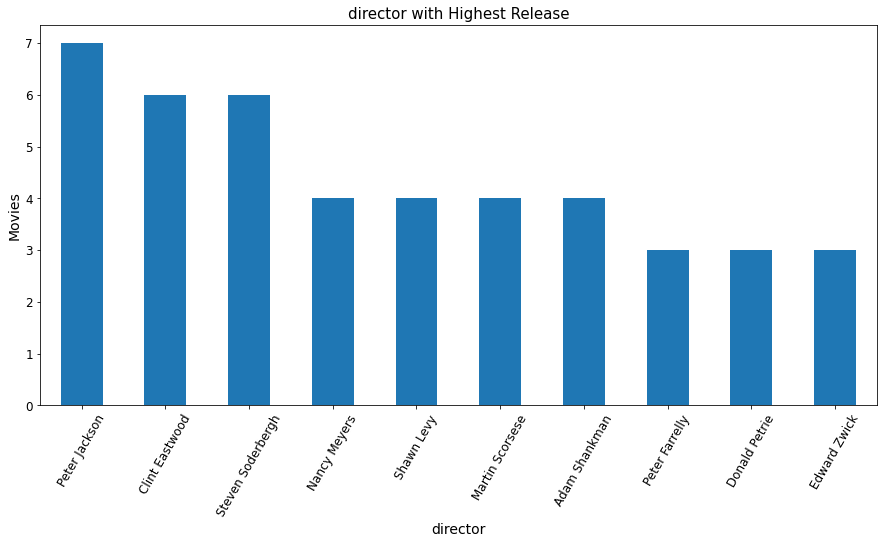

In [81]:
sum_gen=counter(data[data.release_date.dt.month.isin([1, 2, 12,])],'director')
print(sum_gen[:10])
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("director with Highest Release",fontsize=15)
plt.xlabel("director",fontsize=14)
plt.ylabel("Movies",fontsize=14)

In [82]:
w_df = data[data.release_date.dt.month.isin([1, 2, 12,])]
wd_lst = list([x for director in [s.split('|') for s in w_df.director] for x in director])
cwd = Counter(wd_lst)
cwd.most_common(1)

[('Peter Jackson', 7)]

In [83]:
answer_ls.append(5)

# 23. Какая студия даёт самые длинные названия своим фильмам по количеству символов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

In [84]:
data_copy = data.copy()
data_copy['len'] = data_copy.original_title.str.len()
data_copy['production_list'] = data_copy.production_companies.str.split('|')
data_copy.explode('production_list').groupby(by='production_list').agg(
    {'len': 'mean'}).sort_values('len', ascending=False)[:3]

,len
production_list,
Four By Two Productions,83.0
"Jim Henson Company, The",59.0
Dos Corazones,47.0


In [85]:
answer_ls.append(5)

# 25. Названия фильмов какой студии в среднем самые длинные по количеству слов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Midnight Picture Show
4. Paramount Pictures
5. Total Entertainment

In [86]:
data_copy = data.copy()
data_copy['words_number'] = data_copy.overview.map(lambda x: len(x.split(' ')))
data_copy['production_list'] = data_copy.production_companies.str.split('|')
data_copy.explode('production_list').groupby(by='production_list').agg(
    {'words_number': 'mean'}).sort_values('words_number', ascending=False)[:3]

,words_number
production_list,
Midnight Picture Show,175.0
Heineken Branded Entertainment,161.0
Room 9 Entertainment,161.0


In [87]:
answer_ls.append(3)

# 26. Какие фильмы входят в 1 процент лучших по рейтингу?
Варианты ответа:
1. Inside Out, The Dark Knight, 12 Years a Slave
2. BloodRayne, The Adventures of Rocky & Bullwinkle
3. Batman Begins, The Lord of the Rings: The Return of the King, Upside Down
4. 300, Lucky Number Slevin, Kill Bill: Vol. 1
5. Upside Down, Inside Out, Iron Man

In [88]:
border = data.quantile(0.99, numeric_only=True)['vote_average']
print(border)
data.loc[data['vote_average']>border]['original_title']

7.8


9                                          Inside Out
34                                               Room
118                                      Interstellar
119                           Guardians of the Galaxy
125                                The Imitation Game
128                                         Gone Girl
138                          The Grand Budapest Hotel
370                                         Inception
599                                   The Dark Knight
872                                       The Pianist
1081    The Lord of the Rings: The Return of the King
1183                          The Wolf of Wall Street
1191                                 12 Years a Slave
1800                                          Memento
Name: original_title, dtype: object

In [89]:
# Вариант 2
data.groupby(['original_title'])['vote_average'].sum().sort_values(ascending=False).head(int(round(data.original_title.count()*0.01)))

original_title
The Gift                                         12.8
Fantastic Four                                   10.0
The Dark Knight                                   8.1
The Imitation Game                                8.0
Inside Out                                        8.0
Interstellar                                      8.0
Room                                              8.0
The Lord of the Rings: The Return of the King     7.9
Guardians of the Galaxy                           7.9
Gone Girl                                         7.9
The Grand Budapest Hotel                          7.9
Memento                                           7.9
Inception                                         7.9
12 Years a Slave                                  7.9
The Pianist                                       7.9
The Wolf of Wall Street                           7.9
Mr. Nobody                                        7.8
Eternal Sunshine of the Spotless Mind             7.8
Her          

In [90]:
answer_ls.append(1)

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?
Варианты ответа:
1. Johnny Depp & Helena Bonham Carter
2. Ben Stiller & Owen Wilson
3. Vin Diesel & Paul Walker
4. Adam Sandler & Kevin James
5. Daniel Radcliffe & Rupert Grint

In [91]:
pairs = Counter()
for i in range(0,len(data)):
    artists = data.cast[i].split('|')
    for j in combinations(artists, 2):
        if j not in pairs:
            pairs[j] = 1
        else:
            pairs[j] += 1
pairs.most_common(5)

[(('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Rupert Grint', 'Emma Watson'), 7),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Johnny Depp', 'Helena Bonham Carter'), 6)]

In [92]:
# Вариант 2
pairs = data.cast.apply(lambda x: combinations(x.split('|'), 2)).tolist()
flattened = pd.DataFrame(pairs).stack()
flattened.value_counts().head(5)

(Daniel Radcliffe, Rupert Grint)       8
(Daniel Radcliffe, Emma Watson)        8
(Rupert Grint, Emma Watson)            7
(Johnny Depp, Helena Bonham Carter)    6
(Ben Stiller, Owen Wilson)             6
dtype: int64

In [93]:
answer_ls.append(5)

# Submission

In [94]:
len(answer_ls)

27

In [95]:
pd.DataFrame({'Id':range(1,len(answer_ls)+1), 'Answer':answer_ls}, columns=['Id', 'Answer'])

,Id,Answer
0,1,5
1,2,2
2,3,3
3,4,2
4,5,1
5,6,5
6,7,5
7,8,1
8,9,4
9,10,5
